In [203]:
import twitter
import pickle
import pandas as pd
from getpass import getpass
from matplotlib import pyplot as plt

In [173]:
consumer_key = getpass("API key : ")
consumer_secret = getpass("API secret key : ")
access_token_key = getpass("access token : ")
access_token_secret = getpass("secret access token : ")

api = twitter.Api(consumer_key=consumer_key,
                  consumer_secret=consumer_secret,
                  access_token_key=access_token_key,
                  access_token_secret=access_token_secret)

API key : ········
API secret key : ········
access token : ········
secret access token : ········


In [43]:
statuses = api.GetUserTimeline(screen_name='elonmusk',count=200)

In [44]:
print(len(statuses))

200


In [52]:
last_id = statuses[-1].id
print(last_id)

1370947478355333123


In [50]:
res = api.GetUserTimeline(screen_name='elonmusk',count=200,max_id=last_id)

In [51]:
print(len(res))

200


In [48]:
stop = False
while not stop:
    res = api.GetUserTimeline(screen_name='elonmusk',count=200,max_id=last_id)
    statuses = statuses + res[1:]
    last_id = statuses[-1].id
    if len(res)<200:
        stop=True

In [49]:
print(len(statuses))

200


In [32]:
print(statuses[-1])

{"created_at": "Sat Dec 26 19:04:29 +0000 2020", "favorite_count": 1635, "hashtags": [], "id": 1342909163903455233, "id_str": "1342909163903455233", "in_reply_to_screen_name": "IvanEscobosa", "in_reply_to_status_id": 1342908972030836737, "in_reply_to_user_id": 286507556, "lang": "en", "retweet_count": 68, "source": "<a href=\"http://twitter.com/download/iphone\" rel=\"nofollow\">Twitter for iPhone</a>", "text": "@IvanEscobosa @Erdayastronaut @teslaownersSV A few more revisions needed. Probably Beta 10 or 11.", "urls": [], "user": {"created_at": "Tue Jun 02 20:12:29 +0000 2009", "description": "Technoking of Tesla", "favourites_count": 8418, "followers_count": 50435719, "friends_count": 104, "id": 44196397, "id_str": "44196397", "listed_count": 67258, "name": "Elon Musk", "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "prof

In [147]:
last_id = statuses[-1].id
print(last_id)

1256243674268098561


In [184]:
res = api.GetUserTimeline(screen_name='elonmusk',count=200,max_id=last_id)

In [146]:
statuses = statuses + res

In [185]:
print("number of statuses: ",len(statuses))
print("id=",statuses[0].id,", date=",statuses[0].created_at,", text=",statuses[0].text)
print("id=",statuses[-1].id,", date=",statuses[-1].created_at,", text=",statuses[-1].text)
print("\n")
print("number of statuses in last call: ",len(res))
print("id=",res[0].id,", date=",res[0].created_at,", text=",res[0].text)
print("id=",res[-1].id,", date=",res[-1].created_at,", text=",res[-1].text)

number of statuses:  3263
id= 1380487877209956357 , date= Fri Apr 09 11:48:52 +0000 2021 , text= Epilogue is not quite on target though
id= 1256243674268098561 , date= Fri May 01 15:26:46 +0000 2020 , text= And the rocket's red glare, 
the bombs bursting in air


number of statuses in last call:  0


IndexError: list index out of range

In [199]:
#twitter_data = pd.json_normalize(statuses)
statuses_dicts = []
for s in statuses:
    statuses_dicts.append(s.AsDict())

In [200]:
twitter_data = pd.DataFrame(statuses_dicts)
twitter_data.head()

,created_at,favorite_count,hashtags,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,lang,retweet_count,...,urls,user,user_mentions,quoted_status,quoted_status_id,quoted_status_id_str,media,truncated,retweeted_status,possibly_sensitive
0,Fri Apr 09 11:48:52 +0000 2021,12968.0,[],1380487877209956357,1380487877209956357,elonmusk,1.380481e+18,4.419640e+07,en,422,...,[],{'created_at': 'Tue Jun 02 20:12:29 +0000 2009...,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fri Apr 09 11:24:30 +0000 2021,19984.0,[],1380481743531089924,1380481743531089924,elonmusk,1.380481e+18,4.419640e+07,en,540,...,[],{'created_at': 'Tue Jun 02 20:12:29 +0000 2009...,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fri Apr 09 11:21:13 +0000 2021,36855.0,[],1380480918243090433,1380480918243090433,NaN,NaN,NaN,en,2439,...,[{'expanded_url': 'https://twitter.com/sciguys...,{'created_at': 'Tue Jun 02 20:12:29 +0000 2009...,[],{'created_at': 'Mon Sep 28 14:47:26 +0000 2020...,1.310592e+18,1310591955374665729,NaN,NaN,NaN,NaN
3,Fri Apr 09 07:35:55 +0000 2021,2489.0,[],1380424218261692418,1380424218261692418,TeslaGong,1.380424e+18,1.008296e+18,en,67,...,[],{'created_at': 'Tue Jun 02 20:12:29 +0000 2009...,"[{'id': 1008296232261783552, 'id_str': '100829...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fri Apr 09 07:35:17 +0000 2021,1094.0,[],1380424061105266695,1380424061105266695,mikevanbus,1.380377e+18,1.181674e+18,en,30,...,[],{'created_at': 'Tue Jun 02 20:12:29 +0000 2009...,"[{'id': 1181674437986471936, 'id_str': '118167...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [202]:
pickle.dump(twitter_data, open("../data/twitter_musk.pickle",'wb'))

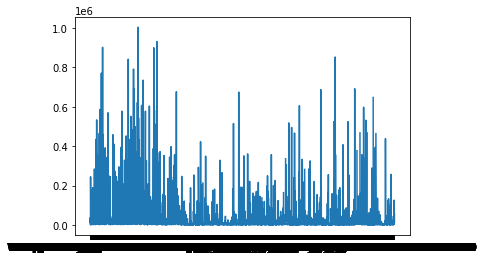

In [204]:
plt.plot(twitter_data["created_at"][:],twitter_data["favorite_count"][:])